# K-fold 교차검증

`=` 지금까지 모델을 선언하고 학습한 후 바로 평가를 진행함

* 일반화 성능, 즉 이후 새로운 데이터에 대한 모델의 성능을 예측하지 못한 상태에서 최종 평가를 수행

* 검증용 데이터가 모델의 일반화된 성능을 예측할 수 있게 도와 줌

* 지만 이것 역시 단 하나의 데이터 셋에 대한 추정일 뿐

*  하나의 데이터 셋에서 얻은 성능으로 정확도에 확신을 가질 수 없음

* 국 더욱 정교한 평가 절차가 필요함

## 개념

*  모든 데이터가 평가에 한 번, 학습에 k-1번 사용

* K개의 분할(Fold)에 대한 성능을 예측 → 평균과 표준편차 계산 → 일반화 성능

* 단, k는 2 이상이 되어야 함(최소한 한 개씩의 학습용, 검증용 데이터가 필요)





## 장단점

1. 장점

*  모든 데이터를 학습과 평가에 사용할 수 있음

* 반복 학습과 평가를 통해 정확도를 향상시킬 수 있음

* 데이터가 부족해서 발생하는 과소적합 문제를 방지할 수 있음

* 평가에 사용되는 데이터의 편향을 막을 수 있음

* 좀 더 일반화된 모델을 만들 수 있음

2. 단점

* 반복 횟수가 많아서 모델 학습과 평가에 많은 시간이 소요됨

## 실습

In [199]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (1) 데이터 이해

**데이터설명**

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

In [4]:
# 데이터 살펴보기
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 기술통계 확인
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### (2) 데이터 준비

In [7]:
# Target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [8]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

`-` 정규화

* KNN 알고리즘을 사용하기 위해 정규화를 진행

In [9]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

### (3) 최적의 모델을 찾기 위한 모델링

`-` 의사결정나무

In [21]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeClassifier(max_depth=5,  random_state=1)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

# 기록
result = {}
result["Decision Tree"] = cv_score.mean()

[0.66666667 0.75925926 0.74074074 0.64814815 0.7037037  0.74074074
 0.75925926 0.81132075 0.79245283 0.67924528]
평균: 0.7301537386443047
표준편차: 0.05141448587329709


`-` KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=5)

cv_score = cross_val_score(model2, x_train_s, y_train,cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())
result["KNN"] = cv_score.mean()

[0.64814815 0.68518519 0.72222222 0.64814815 0.72222222 0.74074074
 0.68518519 0.66037736 0.77358491 0.60377358]
평균: 0.6889587700908455
표준편차: 0.04846522080635871


`-` 로지스틱

In [25]:
from sklearn.linear_model  import LogisticRegression

model3 = LogisticRegression()

cv_score = cross_val_score(model3, x_train, y_train, cv = 10)

result["Logistic"] = cv_score.mean()

`-` 결과

* k-fold 교차검증결과 : Logisitc 모형이 성능이 가장 좋아보인다.

In [26]:
result

{'Decision Tree': 0.7301537386443047,
 'KNN': 0.6889587700908455,
 'Logistic': 0.7690426275331936}

### (4) 성능비교 시각화

<BarContainer object of 3 artists>

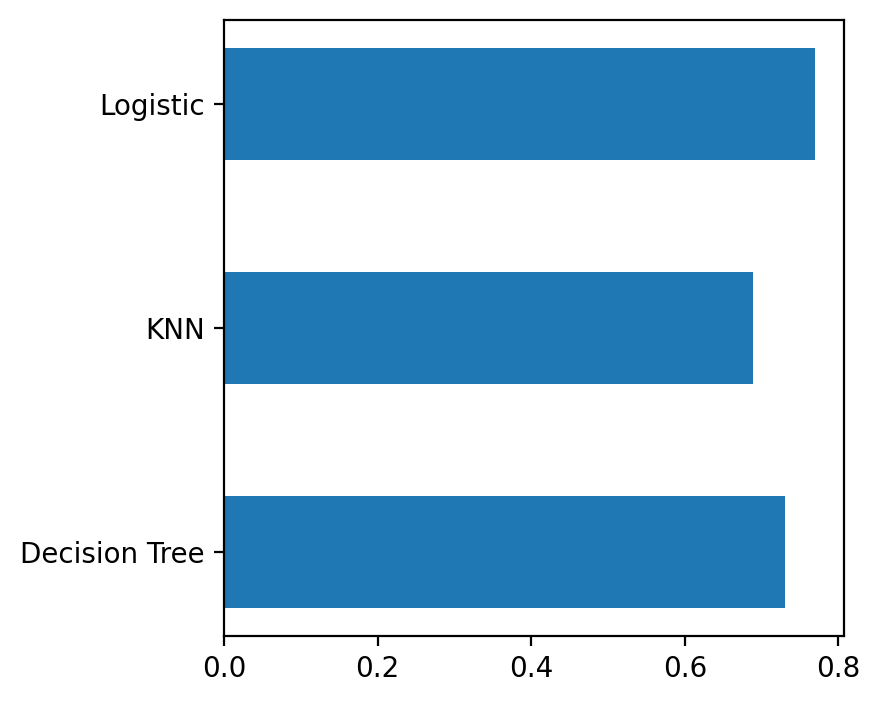

In [40]:
plt.figure(figsize = (4,4))
plt.barh(y=list(result), width = result.values(), height = 0.5)

### (5) test data 평가 (logistic)

`-`  fitting을 다시 하는 이유 

- train data set의 전체 데이터로 학습한 적은 없음......

In [49]:
def score(range = [0.5, 0.71]) : 
            fig = pd.DataFrame({"score" : [acc,pre,recall,f1_score],
                            "measure" : ["acc","precision","recall","f1_score"]}).\
                                    plot(x = "measure", y = "score",  color = "measure",
                                            backend = "plotly", kind =  "bar",height = 500, width = 600)
            fig.update_yaxes(range = range)
            return fig

In [50]:
model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

from sklearn.metrics import * 

acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

In [53]:
score(range = [0.5,0.8])

## exercise. 1

### (1) 데이터 이해

In [71]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [73]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [74]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### (2) 데이터 준비

In [79]:
target = "medv"

x = data.drop(target, axis = 1)
y = data[[target]]

from sklearn.preprocessing import MinMaxScaler
# 정규화
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

### (3) 성능 예측

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


model1 = DecisionTreeRegressor(max_depth = 5)
model2 = KNeighborsRegressor(n_neighbors=5)
model3 = LinearRegression()

cv_score1 = cross_val_score(model1, x_train, y_train, cv = 10, scoring = "r2")
cv_score2 = cross_val_score(model2, x_train_s, y_train, cv = 10, scoring = "r2")
cv_score3 = cross_val_score(model3, x_train, y_train, cv = 10, scoring = "r2")

result = pd.DataFrame({"model" : ["tree", "knn", "linear reg"],
                            "score" : [cv_score1.mean(),cv_score2.mean(), cv_score3.mean()]})

In [106]:
result.sort_values("score", ascending = False).\
                    plot(y = "model", x= "score", kind ="barh",
                            backend = "plotly", color = "model")

### (4) test data 평가 (tree)

In [113]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

measure = ["MAE", "R2"]
score = [mean_absolute_error(y_test, y_pred) ,r2_score(y_test, y_pred)]

In [119]:
pd.DataFrame({ "measure" : measure, 
                             "score" : score}).sort_values("score", ascending = False).\
                                        plot( y= "measure", x="score", kind = "barh", backend ="plotly", color = "measure")

## exercise. 2

### (1) 데이터 이해

**데이터 설명**

- COLLEGE: 대학 졸업여부
- INCOME: 연수입
- OVERAGE: 월평균 초과사용 시간(분)
- LEFTOVER: 월평균 잔여시간비율(%)
- HOUSE: 집값
- HANDSET_PRICE: 스마트폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월평균 장기통화(15분이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화 시간
- REPORTED_SATISFACTION: 만족도 설문조사 결과
- REPORTED_USAGE_LEVEL: 사용도 자가진단 결과
- CONSIDERING_CHANGE_OF_PLAN: 향후 변경계획 설문조사 결과
- CHURN: 이탈(번호이동) 여부 (Target 변수)

In [120]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [121]:
# 데이터 살펴보기
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


### (2) 데이터 준비

In [122]:
data.drop("id", axis = 1, inplace =True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


`-` x, y 분리

In [125]:
target = "CHURN"

x = data.drop(target, axis = 1)
y = [1 if i == "LEAVE" else 0 for i in data[target]]

`-` 가변수화

In [134]:
d_cols = ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"]

x = pd.get_dummies(x, columns= d_cols, drop_first = True, dtype = float)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,36147,0,13,800586,244,0,6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,27273,230,0,305049,201,16,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,120070,38,33,788235,780,3,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,29215,208,85,224784,241,21,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


`-` 학습용 평가 데이터 분리

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

`-` 정규화

In [169]:
from sklearn.preprocessing import MinMaxScaler
# 정규화
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

### (3) 성능 예측

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier(max_depth= 5, random_state = 1)
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = LogisticRegression(random_state = 1)

cvs1 = cross_val_score(model1, x_train, y_train, cv = 10).mean()
cvs2 = cross_val_score(model2, x_train_s, y_train, cv = 10).mean()
cvs3 = cross_val_score(model3, x_train, y_train, cv = 10).mean()

result = pd.DataFrame({"model" : ["tree", "knn", "logistic"],
                                           "score" : [cvs1, cvs2, cvs3]})

In [184]:
result.sort_values("score", ascending = False).\
                        plot(x = "score", y = "model", kind = "barh",
                                backend = "plotly",color = "model")

### (4) test data 평가 (tree)

In [190]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn import metrics
acc, pre, recall, f1_score = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)

In [196]:
def score(range = [0.5, 0.71]) : 
            fig = pd.DataFrame({"score" : [acc,pre,recall,f1_score],
                            "measure" : ["acc","precision","recall","f1_score"]}).\
                                    plot(x = "measure", y = "score",  color = "measure",
                                            backend = "plotly", kind =  "bar",height = 500, width = 600)
            fig.update_yaxes(range = range)
            return fig

In [198]:
score([0.5,0.65])